# **Import Dependencies**

In [1]:
import pandas as pd
import itertools
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from lightgbm import LGBMClassifier
import os
import seaborn as sns
from wordcloud import WordCloud

# **Read CSV File and Convert to Dataframe**

In [2]:
df=pd.read_csv("malicious_phish.csv")
df.shape

(651191, 2)

In [3]:
df.head(10)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://www.pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [4]:
df.tail(10)

,url,type
651181,www.1up.com/do/gameOverview?cId=3159391,phishing
651182,psx.ign.com/articles/131/131835p1.html,phishing
651183,wii.gamespy.com/wii/cursed-mountain/,phishing
651184,wii.ign.com/objects/142/14270799.html,phishing
651185,xbox360.gamespy.com/xbox-360/dead-space/,phishing
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing
651190,www.angelfire.com/goth/devilmaycrytonite/,phishing


In [5]:
df.columns

Index(['url', 'type'], dtype='object')

In [6]:
df.type.value_counts

<bound method IndexOpsMixin.value_counts of 0           phishing
1             benign
2             benign
3         defacement
4         defacement
             ...    
651186      phishing
651187      phishing
651188      phishing
651189      phishing
651190      phishing
Name: type, Length: 651191, dtype: object>

In [7]:
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [9]:
df['type'].unique()

array(['phishing', 'benign', 'defacement', 'malware'], dtype=object)

In [10]:
df.isnull().sum()

url     0
type    0
dtype: int64

# **Plot Histogram to show the Data Distribution**

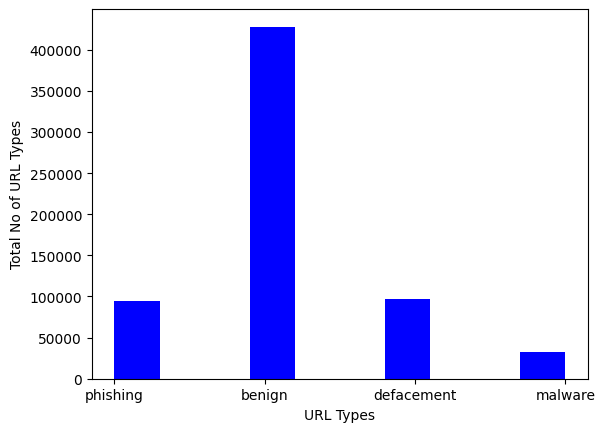

In [11]:
plt.hist(df.type,bins=10,rwidth=15,color='blue')
plt.xlabel('URL Types')
plt.ylabel('Total No of URL Types')
plt.show()

# **Plotting WordCloud**

In [12]:
df_phishing=df[df.type=='phishing']
df_benign=df[df.type=='benign']
df_defacement=df[df.type=='defacement']
df_malware=df[df.type=='malware']

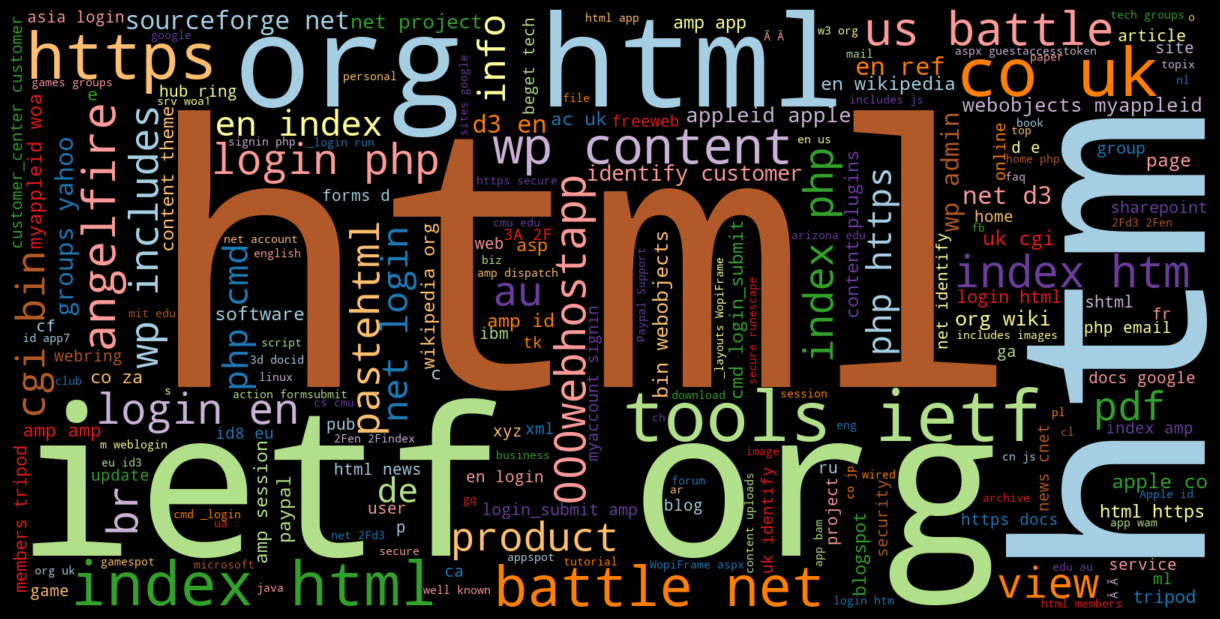

In [13]:
phish_url=" ".join(i for i in df_phishing.url)
worldcloud=WordCloud(width=1600,height=800,colormap='Paired').generate(phish_url)
plt.figure(figsize=(12,14),facecolor='k')
plt.imshow(worldcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

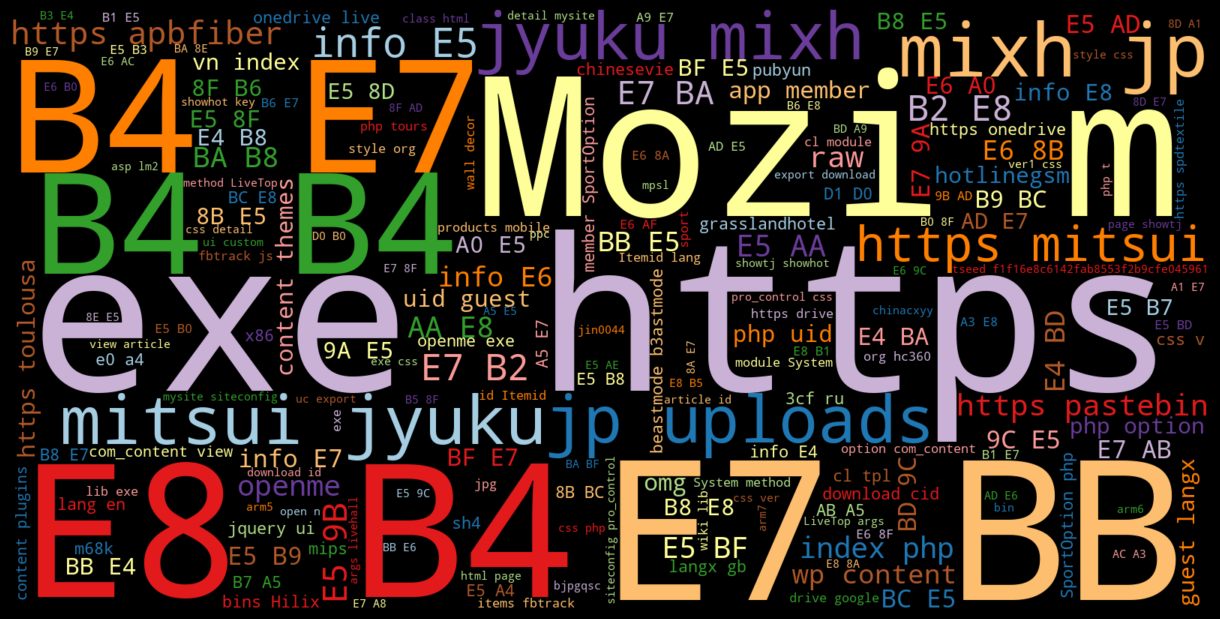

In [14]:
malware_url=" ".join(i for i in df_malware.url)
worldcloud=WordCloud(width=1600,height=800,colormap='Paired').generate(malware_url)
plt.figure(figsize=(12,14),facecolor='k')
plt.imshow(worldcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

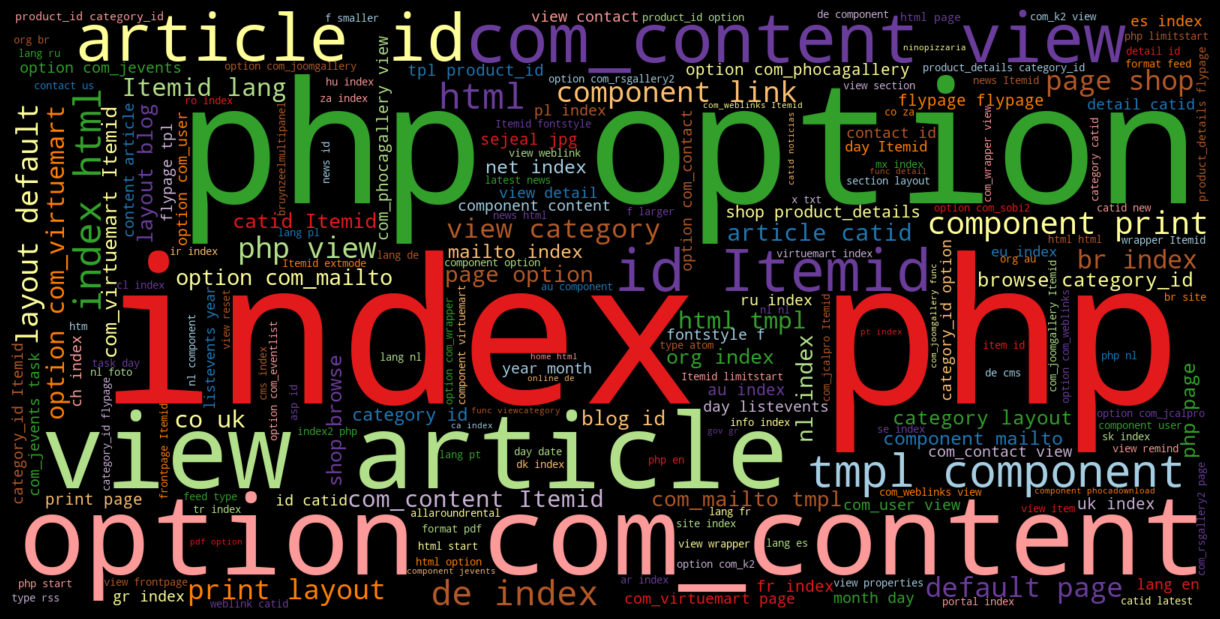

In [15]:
defacement_url=" ".join(i for i in df_defacement.url)
worldcloud=WordCloud(width=1600,height=800,colormap='Paired').generate(defacement_url)
plt.figure(figsize=(12,14),facecolor='k')
plt.imshow(worldcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

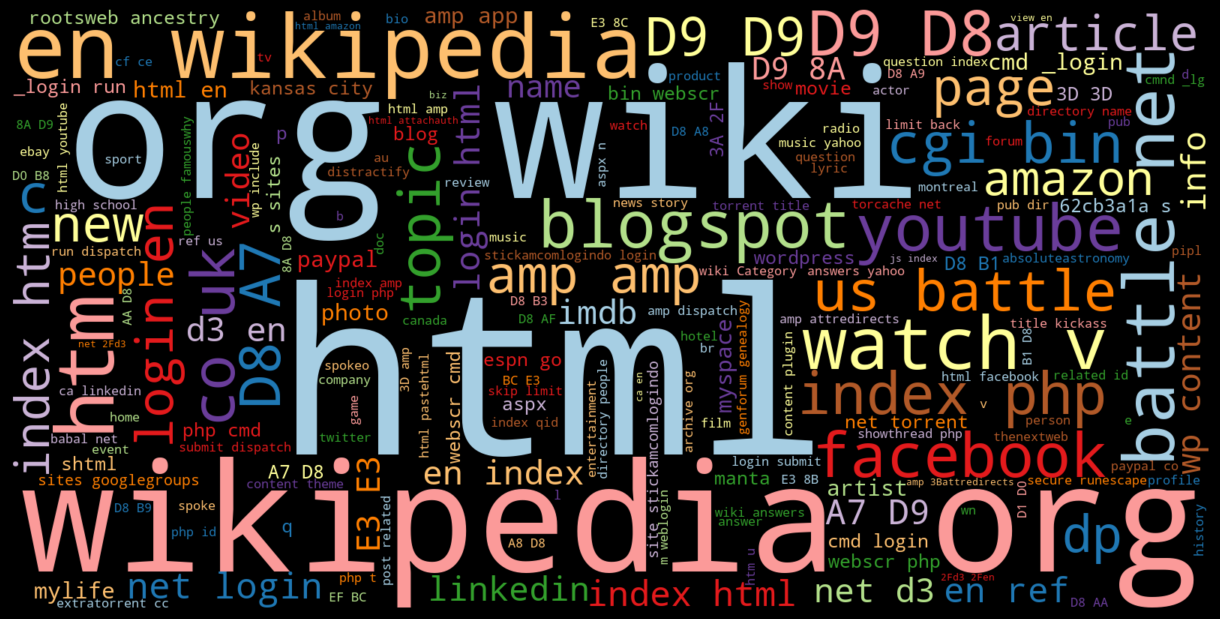

In [16]:
benign_url=" ".join(i for i in df_benign.url)
worldcloud=WordCloud(width=1600,height=800,colormap='Paired').generate(benign_url)
plt.figure(figsize=(12,14),facecolor='k')
plt.imshow(worldcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# **Feature Engineering**

In [17]:
from feature_engineeing import *

In [18]:
df['use_of_ip']=df['url'].apply(lambda x: having_ip_address(x))
df.sample(10)

,url,type,use_of_ip
447848,cflzone.com/forum/viewtopic.php?f=3&t=10065,benign,0
188860,omgili.com/Garret-Hobart,benign,0
551328,http://112.17.152.195:53867/Mozi.m,malware,1
417739,http://olx.ro/i2/electronice-si-electrocasnice...,benign,0
164033,songsterr.com/a/wsa/europe-prisoners-in-paradi...,benign,0
627124,www.devart.com/dotconnect/,phishing,0
497393,redshirttheory.com/,benign,0
131726,moviezen.com/celebrity/raveena-tandon,benign,0
172599,ideas.repec.org/a/prs/recoru/ecoru_0013-0559_1...,benign,0
518722,http://www.prosenior.ch/index.php?option=com_c...,defacement,0


In [19]:
df['abnormal_url']=df['url'].apply(lambda x: abnormal_url(x))
df.sample(10)

,url,type,use_of_ip,abnormal_url
443283,reunion.com/robertphilion/,benign,0,0
644372,www.luxsoft.demon.co.uk/lux/pcw.html,phishing,0,0
507307,http://cltmusic.com/featured/hectagons-live-fr...,malware,0,1
445907,famoustwinszone.blogspot.com/2010/10/brent-sha...,benign,0,0
4448,http://www.spbshkaf.ru/materials/category/-2,defacement,0,1
22441,nydailynews.com/sports/hockey/rangers/ny-range...,benign,0,0
454332,http://correios.com.br/para-voce/consultas-e-s...,benign,0,1
401161,http://affmj.org/index.php?option=com_content&...,defacement,0,1
96302,youtube.com/watch?v=oqIRyezkdjA,benign,0,0
329463,amazon.com/Absolute-Rage-Robert-K-Tanenbaum/dp...,benign,0,0


In [20]:
df['google_index']=df['url'].apply(lambda x:google_index(x))
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index
357961,artlimited.net/,benign,0,0,1
159980,updownleftrigh-t.blogspot.com/,benign,0,0,1
502801,freebase.com/view/en/20th_century_fox,benign,0,0,1
247040,launc.tased.edu.au/online/sciences/PHYSICS/lin...,benign,0,0,1
237847,telegraph.co.uk/atoz/,benign,0,0,1
85797,youtube.com/watch?v=_6Al03wzdDs,benign,0,0,1
599477,paypal.com-us.cgi-bin-webscr-cmd.login-submit-...,benign,0,0,1
14629,http://bdnews24.com/technology/2015/04/17/appl...,benign,0,1,1
352773,http://www.prosenior.ch/index.php?option=com_c...,defacement,0,1,1
45613,gettaiwan.com/real-estate/,benign,0,0,1


In [21]:
df['count.']=df['url'].apply(lambda x:count_dots(x))
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index,count.
60465,melissagenealogy.stormpages.com/Dickson.html,benign,0,0,1,3
355752,pinupexpo.com/?tag=elisabete-cargnello,benign,0,0,1,1
615703,tldp.org/HOWTO/Text-Terminal-HOWTO-9.html,phishing,0,0,1,2
28991,airlinequality.com/Forum/jetsgo-2.htm,benign,0,0,1,2
128757,timeanddate.com/worldclock/city.html?n=1181,benign,0,0,1,2
316412,http://indianexpress.com/article/entertainment...,benign,0,1,1,1
6016,absoluteastronomy.com/topics/Bert_Olmstead,benign,0,0,1,1
306104,http://wxztjz.com/e/public/onclick?enews=donew...,malware,0,1,1,1
305042,youtube.com/watch?v=kBWPQNa_jOY,benign,0,0,1,1
427770,lonestarbank.com/,benign,0,0,1,1


In [22]:
df['count-www']=df['url'].apply(lambda x:count_www(x))
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www
191242,cso.org/,benign,0,0,1,1,0
651168,'www.armchairempire.com/Reviews/PC\%20Games/un...,phishing,0,0,1,3,1
223829,thecanadianencyclopedia.com/index.cfm?PgNm=TCE...,benign,0,0,1,2,0
555952,kundencenter-paypalservice.de/?/de/cgi-bin/web...,benign,0,0,1,1,0
49180,cornwallschools.com/,benign,0,0,1,1,0
540058,http://193.142.146.30/mips,malware,1,1,1,3,0
187955,amazon.com/s?ie=UTF8&rh=n%3A2625373011%2Ck%3AJ...,benign,0,0,1,1,0
345187,myspace.com/danielejohnson,benign,0,0,1,1,0
345286,newgeography.com/content/00745-large-cities-ra...,benign,0,0,1,1,0
99264,zimbio.com/pictures/i4Td43HV1G8/Gary+Barlow+Ou...,benign,0,0,1,1,0


In [23]:
df['count@']=df['url'].apply(lambda x:count_attherate(x))
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@
51163,https://paytm.com/blog/paytm-is-the-online-rec...,benign,0,1,1,1,0,0
522391,http://c1800258.ferozo.com/LOGIN/postale/id/27...,phishing,0,1,1,2,0,0
627846,www.alphaworks.ibm.com/tech/webservicestoolkit,phishing,0,0,1,3,1,0
419608,amazon.com/Hit-List-Unwritten-Law/dp/B000KHX686,benign,0,0,1,1,0,0
155466,digg.com/news/story/Maurice_Mad_Dog_Vachon_Hea...,benign,0,0,1,1,0,0
635359,www.srnmicro.com/virusinfo/,phishing,0,0,1,2,1,0
239973,http://www.z-mobility.eu/sejeal.jpg,defacement,0,1,1,3,1,0
8672,espn.go.com/nfl/standings/_/year/2008,benign,0,0,1,2,0,0
520295,edimage.ca/edimage/grandspersonnages/en/carte_...,benign,0,0,1,2,0,0
414166,beemp3.com/index.php?q=persephone's+bees+muzik...,benign,0,0,1,2,0,0


In [24]:
df['count_dir']=df['url'].apply(lambda x:no_of_dir(x))
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir
151117,imdb.com/title/tt0092099/quotes,benign,0,0,1,1,0,0,3
162452,https://www.gov.uk/government/policies/falklan...,benign,0,1,1,2,1,0,3
412729,footballcardlots.com/football_card/pick.php?pi...,benign,0,0,1,2,0,0,2
341089,chicagoreader.com/chicago/henry-and-hazel-slau...,benign,0,0,1,1,0,0,3
167792,123people.com/s/joe+gould,benign,0,0,1,1,0,0,2
375676,http://thechive.com/category/funny_hilarious_p...,benign,0,1,1,1,0,0,4
259629,facebook.com/steve.dubinsky,benign,0,0,1,2,0,0,1
567634,www.harquivo.com.br/,benign,0,0,1,3,1,0,1
522009,http://aswtx.club/,phishing,0,1,1,1,0,0,1
345139,bookrags.com/biography/mordecai-richler/,benign,0,0,1,1,0,0,3


In [25]:
df['count_embedded_domain']=df['url'].apply(lambda x:no_of_embeddings(x))
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embedded_domain
303937,youtube.com/watch?v=7OQ6ZkQgugc,benign,0,0,1,1,0,0,1,0
350085,911tabs.com/tabs/s/scorpions/fly_people_fly_ta...,benign,0,0,1,2,0,0,4,0
445204,learnfree1.blogspot.com/,benign,0,0,1,2,0,0,1,0
14681,lyricsmode.com/lyrics/l/luba/,benign,0,0,1,1,0,0,4,0
602134,paypal.com-us.cgi-bin-webscr-cmd.login-submit-...,benign,0,0,1,7,0,0,1,0
565877,www.wtondossantos.net/~mpolvora/accounts.depar...,benign,0,0,1,6,1,0,3,0
22421,fightwriter.com/david-lemieux-vs-elvin-ayala,benign,0,0,1,1,0,0,1,0
18285,jachovemsapos.blogspot.com/,benign,0,0,1,2,0,0,1,0
94282,wasagabeach.club,phishing,0,0,1,1,0,0,0,0
1191,http://www.ant-u.com/index.php?option=com_cont...,defacement,0,1,1,3,1,0,1,0


In [26]:
df['short_url']=df['url'].apply(lambda x:shorten_url(x))
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embedded_domain,short_url
504249,tfw2005.com/transformers-news/transformers-mov...,benign,0,0,1,1,0,0,4,0,0
530026,http://egibuk.com/,phishing,0,1,1,1,0,0,1,0,0
152125,sportsmemorabilia.com/team/kansas_jayhawks/fra...,benign,0,0,1,1,0,0,4,0,0
630544,tech.groups.yahoo.com/group/a1ajavajobs/,phishing,0,0,1,3,0,0,3,0,0
135627,thefreelibrary.com/MANIPULATING+THE+ILLUSION+O...,benign,0,0,1,4,0,0,1,0,0
421917,sherdog.com/events/UFC-83-Serra-vs-St-Pierre-I...,benign,0,0,1,1,0,0,2,0,0
63369,https://privatbank.ua/ua/business/srednemu-i-k...,benign,0,1,1,1,0,0,5,0,0
583413,www.azaleasdesign.com/shop/email/login.htm,benign,0,0,1,3,1,0,3,0,0
137848,foxystoat.com/forum/showthread.php?t=11700,benign,0,0,1,2,0,0,2,0,1
160480,drrussellsmith.com/,benign,0,0,1,1,0,0,1,0,0


In [27]:
df['count_https']=df['url'].apply(lambda x:count_https(x))
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embedded_domain,short_url,count_https
245867,http://www.istracentrum.sk/fotogalerie/categor...,defacement,0,1,1,2,1,0,3,0,0,0
181594,http://distractify.com/post/related/id/553fb41...,benign,0,1,1,1,0,0,10,0,0,0
50397,signin.eby.de.td87vxj4yarzdao.civpro.co.za,phishing,0,0,1,6,0,0,0,0,0,0
456820,metalreview.com/reviews/6335/saviours-deaths-p...,benign,0,0,1,1,0,0,3,0,0,0
208643,answers.com/topic/s-p-500,benign,0,0,1,1,0,0,2,0,0,0
457624,rangersfcnews.com/,benign,0,0,1,1,0,0,1,0,0,0
115721,rotoworld.com/player/nhl/1161/player?r=1,benign,0,0,1,1,0,0,4,0,0,0
64996,http://www.windmillag.com.au/toys-and-merchand...,defacement,0,1,1,3,1,0,6,0,0,0
273850,http://9779.info/%E6%89%8B%E5%B7%A5%E5%84%BF%E...,malware,0,1,1,1,0,0,2,0,0,0
311959,http://www.tlcllc.com/home/7-ron-potter-blog/5...,defacement,0,1,1,3,1,0,3,0,0,0


In [28]:
df['count_http']=df['url'].apply(lambda x:count_http(x))
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embedded_domain,short_url,count_https,count_http
482649,http://www.rich.in.ua/archive/67-stiven-kovi-s...,defacement,0,1,1,4,1,0,2,0,0,0,1
225416,collections.walkerart.org/item/agent/42,benign,0,0,1,2,0,0,3,0,0,0,0
506133,maddenfamilyhistory.com/records_australia/reco...,benign,0,0,1,2,0,0,4,0,0,0,0
591432,www.abracadabrafantasias.com.br/~mpolvora/acco...,benign,0,0,1,7,1,0,3,0,0,0,0
432304,mubi.com/cast_members/24979,benign,0,0,1,1,0,0,2,0,0,0,0
492674,montpeliermotorspeedway.com/2011/2011%20Result...,benign,0,0,1,2,0,0,3,0,0,0,0
650441,xbox.ign.com/articles/166/166181p1.html,phishing,0,0,1,3,0,0,3,0,0,0,0
562218,www.tecdiary.org/i/paypol-renew.com.login.54s5...,benign,0,0,1,6,1,0,6,0,0,0,0
365695,homezilla.ca/forSale/Nova_Scotia/Mattatall_Lake/,benign,0,0,1,1,0,0,4,0,0,0,0
24955,denverpost.com/colleges/ci_19325380?source=rss,benign,0,0,1,1,0,0,2,0,1,0,0


In [29]:
df['count%']=df['url'].apply(lambda x:count_percentage(x))
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embedded_domain,short_url,count_https,count_http,count%
438017,ninersnation.com/2011/11/4/2536726/49ers-at-re...,benign,0,0,1,1,0,0,5,0,0,0,0,0
584713,www.rahmet-education.kz/templates/ja_purity/se...,benign,0,0,1,2,1,0,5,0,0,0,0,0
299059,http://9779.info/%E6%89%98%E7%8F%AD%E7%9A%B1%E...,malware,0,1,1,1,0,0,2,0,0,0,1,24
639595,now.cs.berkeley.edu/Xfs/xfs.html,phishing,0,0,1,4,0,0,2,0,0,0,0,0
504723,http://www.portalsaudequantum.com.br/wp-conten...,phishing,0,1,1,4,1,0,6,0,0,0,1,0
506811,http://www.mobilbrikett.hu/index.php?view=arti...,defacement,0,1,1,3,1,0,1,0,0,0,1,0
263587,amelir7d.beget.tech,phishing,0,0,1,2,0,0,0,0,0,0,0,0
214965,hornywhores.net/tag/charley-chase/,benign,0,0,1,1,0,0,3,0,0,0,0,0
498389,ifbb.com/page.php?id=53,benign,0,0,1,2,0,0,1,0,0,0,0,0
145583,http://vivre-productions.com/index.php/product...,defacement,0,1,1,2,0,0,3,0,0,0,1,0


In [30]:
df['count?']=df['url'].apply(lambda x:count_question(x))
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embedded_domain,short_url,count_https,count_http,count%,count?
572810,www.scottpaul.me/wp-includes/images/wlw/pro/al...,benign,0,0,1,3,1,0,5,0,0,0,0,0,0
196589,filmbug.com/db/248938,benign,0,0,1,1,0,0,2,0,0,0,0,0,0
530111,https://yespiper.com/update/update/?email=USER...,phishing,0,1,1,2,0,1,3,0,0,1,1,0,1
437902,salarylist.com/company/Black-And-Veatch-Salary...,benign,0,0,1,2,0,0,2,0,1,0,0,0,0
53171,http://www.tvsk.com.au/shop/35/26/adriano-zumb...,defacement,0,1,1,3,1,0,5,0,0,0,1,0,0
507126,http://www.aims4claims.com/careers.html,defacement,0,1,1,3,1,0,1,0,0,0,1,0,0
455728,forumjar.com/list/434,benign,0,0,1,1,0,0,2,0,0,0,0,0,0
259262,http://www.radiovillage.eu/index.php/rvcommuni...,defacement,0,1,1,4,1,0,4,0,0,0,1,0,0
12965,http://halalreturns.com/index.php?option=com_c...,defacement,0,1,1,2,0,0,1,0,0,0,1,0,1
124770,taney.org/taney2.htm,benign,0,0,1,2,0,0,1,0,0,0,0,0,0


In [31]:
df['count-']=df['url'].apply(lambda x:count_hyphen(x))
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embedded_domain,short_url,count_https,count_http,count%,count?,count-
24015,http://ap.org/Content/AP-In-The-News/2012/AP-p...,benign,0,1,1,1,0,0,4,0,0,0,1,0,0,11
280776,kickette.com/flashing-footballers-can-you-name...,benign,0,0,1,1,0,0,2,0,0,0,0,0,0,9
264233,publicrecords.com/people-search-records/dana-p...,benign,0,0,1,1,0,0,2,0,0,0,0,0,0,3
487459,http://stackoverflow.com/questions/901115/how-...,benign,0,1,1,1,0,0,3,0,0,0,1,0,0,8
629756,www.msg.ameslab.gov/GAMESS/GAMESS.html,phishing,0,0,1,4,1,0,2,0,0,0,0,0,0,0
600933,paypal.com-service.confirm.cgi-bin.webscr-cmd....,benign,0,0,1,14,0,0,3,0,0,0,0,0,0,4
151062,http://www.fonatsch.at/index.php/stahlmaste/an...,defacement,0,1,1,4,1,0,3,0,0,0,1,0,0,0
177781,http://perezhilton.com/cocoperez/2014-12-24-ex...,benign,0,1,1,1,0,0,3,0,0,0,1,0,1,8
33260,pipl.com/directory/people/Diane/Lowden,benign,0,0,1,1,0,0,4,0,0,0,0,0,0,0
223198,stepintohistory.com/states/MO/Missouri_1855.htm,benign,0,0,1,2,0,0,3,0,0,0,0,0,0,0


In [32]:
df['count=']=df['url'].apply(lambda x:count_equalto(x))
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embedded_domain,short_url,count_https,count_http,count%,count?,count-,count=
11290,airhighways.com/air_transat.htm,benign,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0
11975,en-pi.facebook.com/TheOnlyDonHere,benign,0,0,1,2,0,0,1,0,0,0,0,0,0,1,0
575127,onejade.com/img/?us.battle.net/login/en/?ref=u...,benign,0,0,1,5,0,0,2,0,0,0,0,0,2,0,1
368071,stubhub.com/municipal-auditorium-kansas-city-t...,benign,0,0,1,1,0,0,2,0,0,0,0,0,0,4,0
477820,ayfl.com/,benign,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
305785,eliteprospects.com/player.php?player=5693,benign,0,0,1,2,0,0,1,0,0,0,0,0,1,0,1
643590,www.thistlesoft.com/PrEditor/,phishing,0,0,1,2,1,0,2,0,1,0,0,0,0,0,0
643310,www.roundhillsoftware.com/MessageCleaner/,phishing,0,0,1,2,1,0,2,0,0,0,0,0,0,0,0
215210,http://nguyentandung.org/chuyen-an-c30-va-su-h...,benign,0,1,1,2,0,0,1,0,0,0,1,0,0,13,0
487564,http://9779.info/ppt%E5%89%AA%E8%B4%B4%E7%94%B...,malware,0,1,1,1,0,0,2,0,0,0,1,16,0,0,0


In [33]:
df['url_length']=df['url'].apply(lambda x:url_length(x))
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embedded_domain,short_url,count_https,count_http,count%,count?,count-,count=,url_length
254393,http://www.schuetzenverein-beelen.de/index.php...,defacement,0,1,1,3,1,0,1,0,0,0,1,0,1,2,9,188
512459,http://medireim.net/x1yZ2scDe/webscr_prim.php?...,phishing,0,1,1,2,0,0,2,0,0,0,1,0,1,0,1,121
522833,http://wilstv.com/https:/www.paypal.com/signin/,phishing,0,1,1,3,1,0,4,0,0,1,2,0,0,0,0,47
430334,en.wikipedia.org/wiki/Suncor_Energy,benign,0,0,1,2,0,0,2,0,0,0,0,0,0,0,0,35
635861,www.relisoft.com/co_op/,phishing,0,0,1,2,1,0,2,0,1,0,0,0,0,0,0,23
624449,www2004.org/proceedings/docs/2p290.pdf,phishing,0,0,1,2,1,0,3,0,0,0,0,0,0,0,0,38
317286,uboat.net/allies/commanders/index.html?letter=H,benign,0,0,1,2,0,0,3,0,0,0,0,0,1,0,1,47
97416,http://www.donganshi.com/Show_P.asp?Id=979,defacement,0,1,1,3,1,0,1,0,0,0,1,0,1,0,1,42
58867,carlarossi.blogspot.com/2007_06_01_archive.html,benign,0,0,1,3,0,0,1,0,1,0,0,0,0,0,0,47
443914,music.yahoo.com/galt-macdermot-new-pulse-jazz-...,benign,0,0,1,2,0,0,2,0,0,0,0,0,0,5,0,51


In [34]:
df['hostname_length']=df['url'].apply(lambda x:hostname_length(x))
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embedded_domain,short_url,count_https,count_http,count%,count?,count-,count=,url_length,hostname_length
90535,ballistictest.flamingfish.com/,benign,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,30,0
188788,http://fishki.net/video/1531916-sobaka-nauchil...,benign,0,1,1,2,0,0,2,0,0,0,1,0,1,3,2,85,10
246320,akira-jav.com/peach-028-pink-seisyun-woman-sch...,benign,0,0,1,1,0,0,2,0,0,0,0,0,0,18,0,118,0
289982,freewebs.com/boxingondvd/boxeursduqubec.htm,benign,0,0,1,2,0,0,2,0,0,0,0,0,0,0,0,43,0
591354,successinsimulation.com/Paypal_Virefication/37...,benign,0,0,1,2,0,0,3,0,0,0,0,0,0,0,0,86,0
240671,montrealgazette.com/columnists/l_ian_macdonald...,benign,0,0,1,2,0,0,2,0,0,0,0,0,0,0,0,51,0
605429,www.mamut.net/eide/,phishing,0,0,1,2,1,0,2,0,0,0,0,0,0,0,0,19,0
305508,http://www.merlegkepeskonyvelotanfolyam.hu/tov...,defacement,0,1,1,3,1,0,1,0,0,0,1,0,0,1,0,63,35
254832,http://www.liceorutigliano.com/index.php?optio...,defacement,0,1,1,3,1,0,1,0,0,0,1,0,1,0,5,127,23
576990,www.cisema.com.cn/login.htm?us.battle.net/logi...,benign,0,0,1,8,1,0,1,0,0,0,0,0,2,1,2,103,0


In [35]:
df['sus_url']=df['url'].apply(lambda x:suspicious_words(x))
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embedded_domain,short_url,count_https,count_http,count%,count?,count-,count=,url_length,hostname_length,sus_url
167301,goldstar.com/events/atlanta-ga/comedian-sugar-...,benign,0,0,1,1,0,0,3,0,0,0,0,0,0,3,0,51,0,0
616104,ibdhost.com/help/html/,phishing,0,0,1,1,0,0,3,0,1,0,0,0,0,0,0,22,0,0
373680,youtube.com/watch?v=wou1FLzyxsg,benign,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,31,0,0
235823,wellness.com/dir/2360991/internist/nj/long-bra...,benign,0,0,1,1,0,0,6,0,0,0,0,0,0,3,0,68,0,0
603435,edis.ifas.ufl.edu/TOPIC_Forage,phishing,0,0,1,3,0,0,1,0,0,0,0,0,0,0,0,30,0,0
455237,therobleereport.com/,benign,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,20,0,0
418263,http://emgn.com/entertainment/spot-them-if-you...,benign,0,1,1,1,0,0,3,0,0,0,1,0,0,16,0,119,8,0
160714,ringbellesonline.com/tag/taylor-matheny/,benign,0,0,1,1,0,0,3,0,0,0,0,0,0,1,0,40,0,0
646744,www.gamereport.com/tgr19/alphablitz.html,phishing,0,0,1,3,1,0,2,0,1,0,0,0,0,0,0,40,0,0
617688,www.eline.se/evasgraphics/Dw/,phishing,0,0,1,2,1,0,3,0,0,0,0,0,0,0,0,29,0,0


In [36]:
df['count_digits']=df['url'].apply(lambda x:digit_count(x))
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embedded_domain,...,count_https,count_http,count%,count?,count-,count=,url_length,hostname_length,sus_url,count_digits
382650,youtube.com/watch?v=Jj5f7gRLVFQ,benign,0,0,1,1,0,0,1,0,...,0,0,0,1,0,1,31,0,0,2
417052,bureaucracyblog.com/kays-gary-library/kays-eulogy,benign,0,0,1,1,0,0,2,0,...,0,0,0,0,3,0,49,0,0,0
563195,kuncorporation.com/chinamex/Paypal_Vireficatio...,benign,0,0,1,1,0,0,4,0,...,0,0,0,0,0,0,81,0,0,19
227019,universalcycles.com/,benign,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,20,0,0,0
545922,http://172.36.49.12:45693/Mozi.m,malware,1,1,1,4,0,0,1,0,...,0,1,0,0,0,0,32,18,0,14
328650,encyclopedia.com/topic/Sir_Louis_Hippolyte_LaF...,benign,0,0,1,2,0,0,2,0,...,0,0,0,0,0,0,58,0,0,0
156955,http://udn.com/news/story/7089/885238-%E3%80%8...,benign,0,1,1,1,0,0,4,0,...,0,1,48,0,2,0,188,7,0,69
537787,http://50.115.173.126/armv7l,malware,1,1,1,3,0,0,1,0,...,0,1,0,0,0,0,28,14,0,12
238763,kmbc.com/news/29594410/detail.html,benign,0,0,1,2,0,0,3,0,...,0,0,0,0,0,0,34,0,0,8
598953,bonnietijerina.com/vodasecurity/security.php,benign,0,0,1,2,0,0,2,0,...,0,0,0,0,0,0,44,0,0,0


In [37]:
df['count_letters']=df['url'].apply(lambda x:letter_count(x))
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embedded_domain,...,count_http,count%,count?,count-,count=,url_length,hostname_length,sus_url,count_digits,count_letters
81973,stuffaboutnames.com/marian/index.htm,benign,0,0,1,2,0,0,2,0,...,0,0,0,0,0,36,0,0,0,32
25857,youtube.com/watch?v=LaMMMlTsOrw,benign,0,0,1,1,0,0,1,0,...,0,0,1,0,1,31,0,0,0,27
271421,rcdl2009.krc.karelia.ru/participant_list.php?&...,benign,0,0,1,4,0,0,1,0,...,0,0,1,0,1,53,0,0,4,40
495297,worksheets.theteacherscorner.net/make-your-own...,benign,0,0,1,3,0,0,3,0,...,0,0,0,4,0,68,0,0,0,58
593270,oldenzaal4.nl/smilies/USAA/ntasa/5733d7ea4d4e9...,benign,0,0,1,2,0,0,5,0,...,0,0,0,0,0,75,0,0,22,46
1543,mlive.com/business/,benign,0,0,1,1,0,0,2,0,...,0,0,0,0,0,19,0,0,0,16
434347,nytimes.com/2001/05/15/arts/jason-miller-playw...,benign,0,0,1,2,0,0,5,0,...,0,0,0,7,0,77,0,0,10,53
152580,http://emgn.com/entertainment/when-wallace-the...,benign,0,1,1,1,0,0,3,0,...,1,0,0,17,0,134,8,0,1,109
89399,therumpus.net/2009/09/where-god-and-the-devil-...,benign,0,0,1,1,0,0,4,0,...,0,0,0,11,0,86,0,0,6,64
30992,californiakids.org/,benign,0,0,1,1,0,0,1,0,...,0,0,0,0,0,19,0,0,0,17


In [38]:
df['fd_length']=df['url'].apply(lambda x:fd_length(x))
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embedded_domain,...,count%,count?,count-,count=,url_length,hostname_length,sus_url,count_digits,count_letters,fd_length
333734,lowkick.blitzcorner.com/tags/UFC/UFC-124,benign,0,0,1,2,0,0,3,0,...,0,0,1,0,40,0,0,3,31,4
296643,sportsillustrated.cnn.com/football/nfl/preview...,benign,0,0,1,2,0,0,8,0,...,0,0,0,0,76,0,0,8,57,8
435674,http://www.photoremote.de/en/component/user/reset,defacement,0,1,1,2,1,0,4,0,...,0,0,0,0,49,18,0,0,40,2
110427,blairrobertson.com/blog/predictions-china-disa...,benign,0,0,1,1,0,0,3,0,...,0,0,8,0,97,0,0,0,85,4
123644,thefreelibrary.com/Eddie+and+the+Jets.-a014306...,benign,0,0,1,2,0,0,1,0,...,0,0,1,0,50,0,1,10,33,31
416083,woodsmensports.com/USF.html,benign,0,0,1,2,0,0,1,0,...,0,0,0,0,27,0,0,0,24,8
550946,https://mitsui-jyuku.mixh.jp/uploads/12643fvas...,malware,0,1,1,3,0,0,2,0,...,0,0,1,0,52,20,0,5,38,7
36576,http://www.ok-styl.eu/index.php?option=com_con...,defacement,0,1,1,3,1,0,1,0,...,0,1,5,6,129,14,0,7,95,9
489432,lostateminor.com/2011/07/21/jean-pierre-roy-2/,benign,0,0,1,1,0,0,5,0,...,0,0,3,0,46,0,0,9,28,4
84845,eceae.org/en/resources,benign,0,0,1,1,0,0,2,0,...,0,0,0,0,22,0,0,0,19,2


In [39]:
from tld import get_tld
import os.path
df['tld']=df['url'].apply(lambda x:get_tld(x,fail_silently=True))
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embedded_domain,...,count?,count-,count=,url_length,hostname_length,sus_url,count_digits,count_letters,fd_length,tld
27835,visionfilms.net/catalog/featured_films/urban/b...,benign,0,0,1,2,0,0,4,0,...,0,0,0,67,0,0,0,58,7,None
364414,gatasi.com/tag/tun,benign,0,0,1,1,0,0,2,0,...,0,0,0,18,0,0,0,15,3,None
202924,hfespotomac.org/news0009.htm,benign,0,0,1,2,0,0,1,0,...,0,0,0,28,0,0,4,21,12,None
181271,nethelper.com/article/Canadian_Coast_Guard,benign,0,0,1,1,0,0,2,0,...,0,0,0,42,0,0,0,37,7,None
165626,picktorrent.com/torrents/18/annabelle-flowers/,benign,0,0,1,1,0,0,4,0,...,0,1,0,46,0,0,2,38,8,None
317544,nhluniforms.com/Coyotes/Coyotes.html,benign,0,0,1,2,0,0,2,0,...,0,0,0,36,0,0,0,32,7,None
149482,http://rendeck.com/index.php/nl/consultants/va...,defacement,0,1,1,3,0,0,4,0,...,0,0,0,55,11,0,1,44,9,com
635152,www.amicutilities.com/privacy-guard/,phishing,0,0,1,2,1,0,2,0,...,0,1,0,36,0,0,0,31,13,None
14219,mylife.com/franmull,benign,0,0,1,1,0,0,1,0,...,0,0,0,19,0,0,0,17,8,None
209857,examiner.com/christian-book-review-in-seattle/...,benign,0,0,1,1,0,0,2,0,...,0,14,0,123,0,0,0,106,32,None


In [40]:
df['tld_length']=df['tld'].apply(lambda x:tld_length(x))
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embedded_domain,...,count-,count=,url_length,hostname_length,sus_url,count_digits,count_letters,fd_length,tld,tld_length
528146,http://energiaysistemas.com.sv/images/48ff214a...,phishing,0,1,1,3,0,0,3,0,...,0,0,81,23,0,20,52,6,com.sv,6
310881,absoluteastronomy.com/topics/Montreal_Neurolog...,benign,0,0,1,1,0,0,2,0,...,0,0,60,0,0,0,55,6,None,-1
197236,local.yahoo.com/info-22087523-washington-park-...,benign,0,0,1,2,0,0,1,0,...,4,0,50,0,0,8,35,34,None,-1
48189,business.highbeam.com/4341/article-1G1-8020667...,benign,0,0,1,2,0,0,3,0,...,4,0,72,0,0,14,49,4,None,-1
378390,profilecanada.com/companydetail.cfm?company=25...,benign,0,0,1,2,0,0,1,0,...,0,1,91,0,0,7,73,17,None,-1
141309,123people.com/s/michael+hutchinson,benign,0,0,1,1,0,0,2,0,...,0,0,34,0,0,3,27,1,None,-1
30876,home.comcast.net/~mawerth/,benign,0,0,1,2,0,0,2,0,...,0,0,26,0,0,0,21,8,None,-1
269410,http://mahshov.com/index.php?option=com_conten...,defacement,0,1,1,2,0,0,1,0,...,10,5,125,11,0,34,62,9,com,3
166918,http://www.penzkofer-kachelofenbau.de/index.ph...,defacement,0,1,1,3,1,0,1,0,...,1,4,96,30,0,4,75,9,de,2
130512,http://www.barbarisband.ru/Dropbox/dropbox/dro...,phishing,0,1,1,2,1,0,5,0,...,0,0,59,19,0,0,49,7,ru,2


In [41]:
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embedded_domain,...,count-,count=,url_length,hostname_length,sus_url,count_digits,count_letters,fd_length,tld,tld_length
463417,finance.yahoo.com/news/NBCUniversal-offers-to-...,benign,0,0,1,3,0,0,2,0,...,4,0,65,0,0,10,46,4,None,-1
565301,www.reputableonlinecolleges.com/www.paypal.fr_...,benign,0,0,1,8,2,0,5,0,...,2,2,273,0,1,77,173,43,None,-1
86105,yellowbot.com/cuz-n-laws-wholesale-food-paper-...,benign,0,0,1,2,0,0,1,0,...,9,0,80,0,0,0,68,66,None,-1
357864,http://www.unfallhilfe-bayern.de/index.php/new...,defacement,0,1,1,3,1,0,2,0,...,1,0,52,25,0,0,43,9,de,2
204456,amazon.com/They-Thought-Themselves-Confront-Fo...,benign,0,0,1,1,0,0,3,0,...,4,0,67,0,0,10,49,42,None,-1
490491,http://greatplainschurch.org/prayer-list.html,defacement,0,1,1,2,0,0,1,0,...,1,0,45,21,0,0,38,16,org,3
414874,http://www.kidsfestshellharbour.com.au/index.p...,defacement,0,1,1,4,1,0,1,0,...,4,5,149,31,0,11,113,9,com.au,6
631621,www.webweasel.com/lisp/,phishing,0,0,1,2,1,0,2,0,...,0,0,23,0,0,0,19,4,None,-1
387943,santabanta.com/wallpapers/category.asp?catname...,benign,0,0,1,2,0,0,2,0,...,0,1,66,0,0,2,57,10,None,-1
501876,facebook.com/keith.byars,benign,0,0,1,2,0,0,1,0,...,0,0,24,0,0,0,21,11,None,-1


In [42]:
df.columns

Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'google_index', 'count.',
       'count-www', 'count@', 'count_dir', 'count_embedded_domain',
       'short_url', 'count_https', 'count_http', 'count%', 'count?', 'count-',
       'count=', 'url_length', 'hostname_length', 'sus_url', 'count_digits',
       'count_letters', 'fd_length', 'tld', 'tld_length'],
      dtype='object')

In [43]:
df['type'].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

# **Target Encoding**

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['type'])
df['label'].value_counts()

label
0    428103
1     96457
3     94111
2     32520
Name: count, dtype: int64

In [69]:
df.drop("tld",axis=1,inplace=True)

In [70]:
df.sample(10)

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embedded_domain,...,count-,count=,url_length,hostname_length,sus_url,count_digits,count_letters,fd_length,tld_length,label
613533,citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1...,phishing,1,0,1,7,0,0,2,0,...,0,1,56,0,0,10,35,7,-1,3
308617,elvisandlaura.com,phishing,0,0,1,1,0,0,0,0,...,0,0,17,0,0,0,16,0,-1,3
451879,mylife.com/dpj2222,benign,0,0,1,1,0,0,1,0,...,0,0,18,0,0,4,12,7,-1,0
300924,articles.boston.com/2011-05-16/ae/29549087_1_p...,benign,0,0,1,2,0,0,3,0,...,5,0,75,0,0,17,46,10,-1,0
322927,simonstownbangi.co.za,phishing,0,0,1,2,0,0,0,0,...,0,0,21,0,0,0,19,0,-1,3
547175,http://115.56.140.227:46380/Mozi.m,malware,1,1,1,4,0,0,1,0,...,0,0,34,20,0,16,9,6,-1,2
123943,forum.bittorrent.com/topic/1444-file-wont-play/,benign,0,0,1,2,0,0,3,0,...,3,0,47,0,0,4,35,5,-1,0
325663,youtube.com/watch?v=9VH20SYKH-Q,benign,0,0,1,1,0,0,1,0,...,1,1,31,0,0,3,23,5,-1,0
378639,facebook.com/people/Matt-Wertz/706205901,benign,0,0,1,1,0,0,3,0,...,1,0,40,0,0,9,26,6,-1,0
612999,www.glob-sped.ch/index_e.htm,phishing,0,0,1,3,1,0,1,0,...,1,0,28,0,0,0,22,11,-1,3


# **Exploratory Data Analysis(EDA)**

### **1. Distribution of use_of_ip**

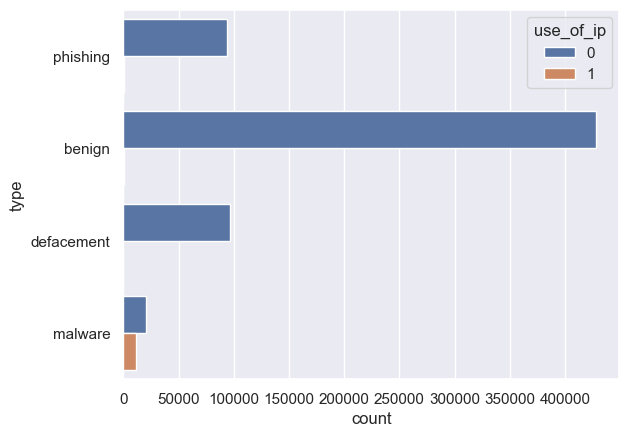

In [48]:
import seaborn as sns
sns.set(style="darkgrid")
ax=sns.countplot(y='type',data=df,hue='use_of_ip')

### **2. Distribution of Abnormal URL**

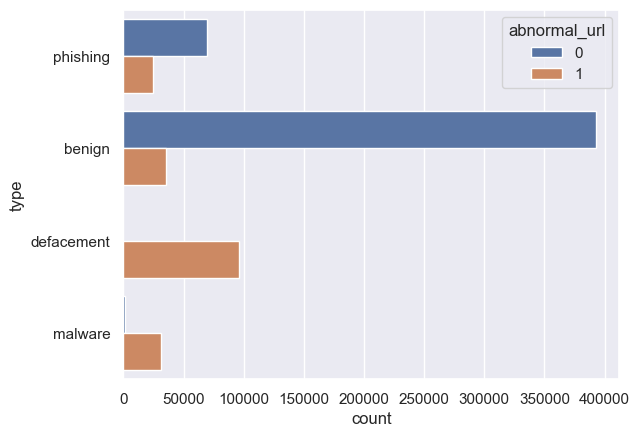

In [49]:
import seaborn as sns
sns.set(style="darkgrid")
ax=sns.countplot(y='type',data=df,hue='abnormal_url')

### **3. Distribution of Google Index**

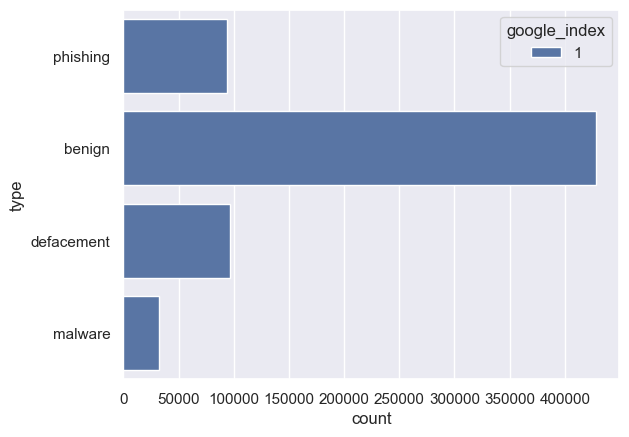

In [50]:
sns.set(style="darkgrid")
ax=sns.countplot(y='type',data=df,hue='google_index')

### **4. Distribution of Short URL**

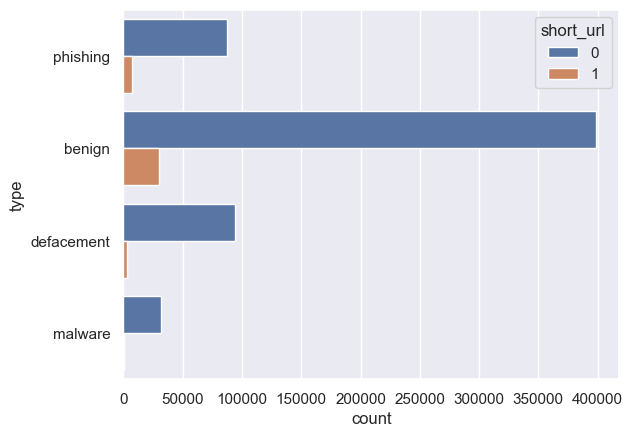

In [51]:
sns.set(style="darkgrid")
ax=sns.countplot(y='type',data=df,hue='short_url')

### **5. Distribution of Suspicious URL**

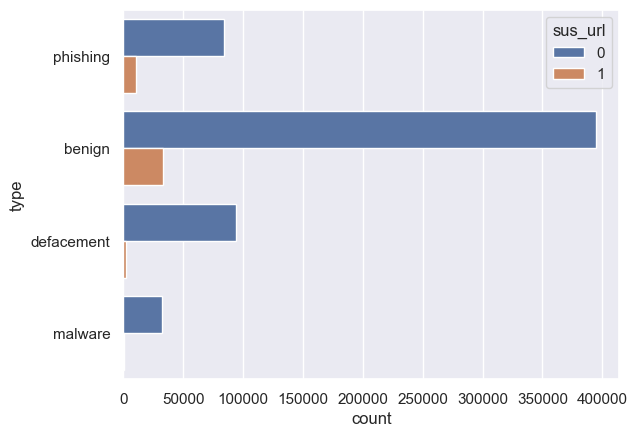

In [52]:
sns.set(style="darkgrid")
ax=sns.countplot(y='type',data=df,hue='sus_url')

### **6. Distribution of Count of Dots[.]**

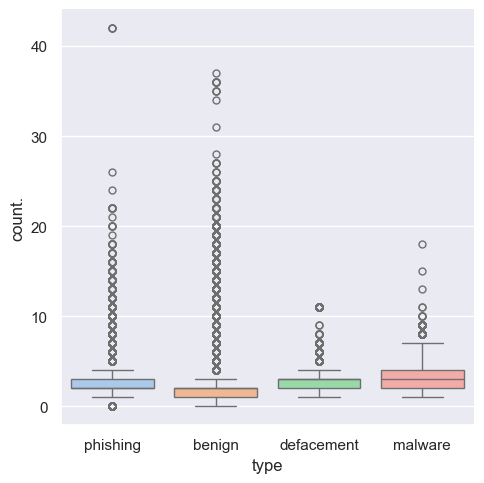

In [61]:
sns.set_theme(style="darkgrid")
ax=sns.catplot(x='type',y='count.',data=df,kind='box',palette='pastel',hue='type',legend=False)

### **7. Distribution of count_www**

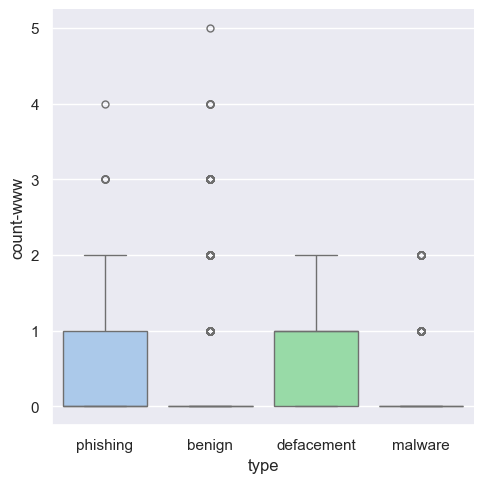

In [62]:
sns.set_theme(style="darkgrid")
ax=sns.catplot(x='type',y='count-www',data=df,kind='box',palette='pastel',hue='type',legend=False)

### **8. Distribution of count@**

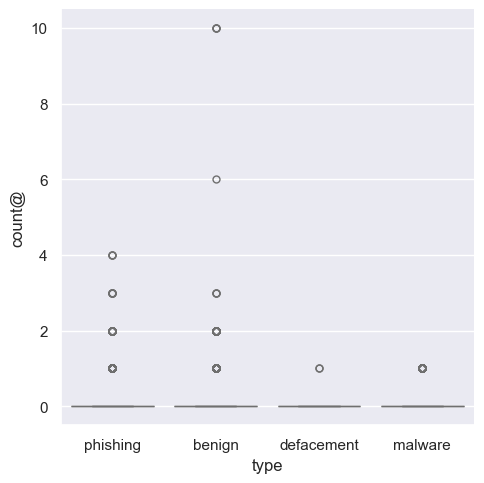

In [63]:
sns.set_theme(style="darkgrid")
ax=sns.catplot(x='type',y='count@',data=df,kind='box',palette='pastel',hue='type',legend=False)

### **9. Distribution of count_dir**

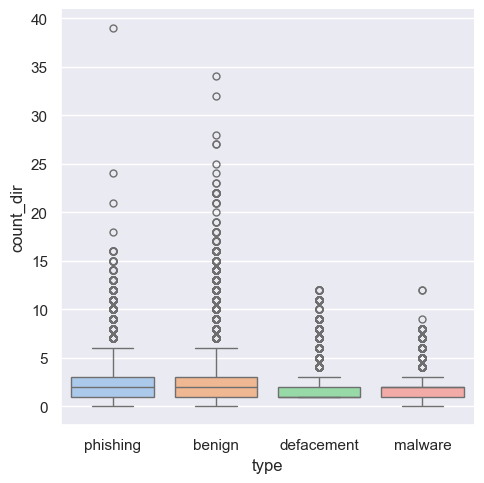

In [64]:
sns.set_theme(style="darkgrid")
ax=sns.catplot(x='type',y='count_dir',data=df,kind='box',palette='pastel',hue='type',legend=False)

### **10. Distribution of Hostname Length**

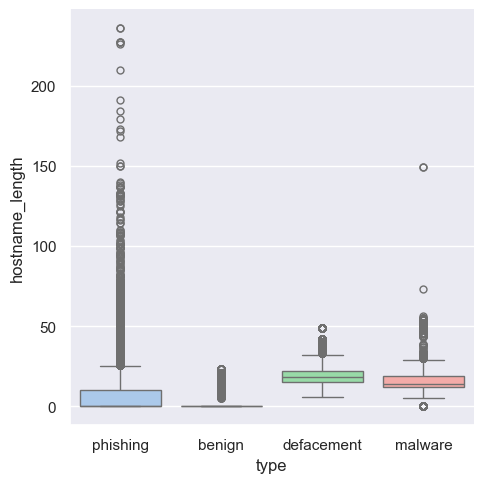

In [65]:
sns.set_theme(style="darkgrid")
ax=sns.catplot(x='type',y='hostname_length',data=df,kind='box',palette='pastel',hue='type',legend=False)

### **11. Distribution of First Directory Length**

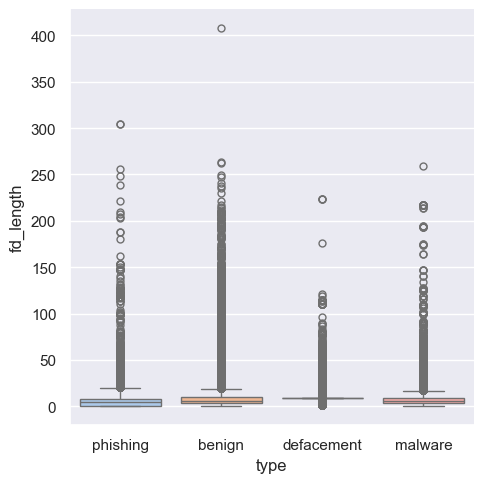

In [66]:
sns.set_theme(style="darkgrid")
ax=sns.catplot(x='type',y='fd_length',data=df,kind='box',palette='pastel',hue='type',legend=False)

### **Distribution of Top-Level Domain Length**

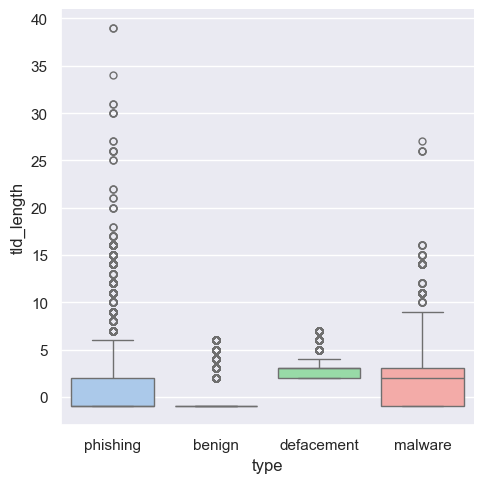

In [67]:
sns.set_theme(style="darkgrid")
ax=sns.catplot(x='type',y='tld_length',data=df,kind='box',palette='pastel',hue='type',legend=False)

# **Creation of Feature & Target**

In [81]:
#Filtering Out Google Index as it has only 1 value
x=df[['use_of_ip', 'abnormal_url','count.',
    'count-www', 'count@', 'count_dir', 'count_embedded_domain',
    'short_url', 'count_https', 'count_http', 'count%', 'count?', 'count-',
    'count=', 'url_length', 'hostname_length', 'sus_url', 'count_digits',
    'count_letters', 'fd_length', 'tld_length']]

y=df['label']

In [82]:
x.head()

,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embedded_domain,short_url,count_https,count_http,...,count?,count-,count=,url_length,hostname_length,sus_url,count_digits,count_letters,fd_length,tld_length
0,0,0,2,0,0,0,0,0,0,0,...,0,1,0,16,0,0,0,13,0,-1
1,0,0,2,0,0,2,0,0,0,0,...,0,0,0,35,0,0,1,29,5,-1
2,0,0,2,0,0,3,0,0,0,0,...,0,0,0,31,0,0,1,25,7,-1
3,0,1,3,1,0,1,0,0,0,1,...,1,1,4,88,21,0,7,63,9,2
4,0,1,2,0,0,1,0,0,0,1,...,1,1,3,235,23,0,22,199,9,3


In [83]:
x.columns

Index(['use_of_ip', 'abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embedded_domain', 'short_url', 'count_https',
       'count_http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'count_digits', 'count_letters',
       'fd_length', 'tld_length'],
      dtype='object')

In [84]:
y.head()

0    3
1    0
2    0
3    1
4    1
Name: label, dtype: int32

# **Train Test Split**

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,shuffle=True,random_state=5)

# **Model Building**

### **1. Random Forest Classifier - Base Model**

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,max_features='sqrt')
model_rf=rf.fit(x_train,y_train)

In [88]:
train_pred_rf=model_rf.predict(x_train)
test_pred_rf=model_rf.predict(x_test)

In [92]:
print(f'Training Accuracy of Random Forest Classifier : ',accuracy_score(y_train,train_pred_rf)*100)
print(f'Testing Accuracy of Random Forest Classifier : ',accuracy_score(y_test,test_pred_rf)*100)

Training Accuracy of Random Forest Classifier :  98.62463336353446
Testing Accuracy of Random Forest Classifier :  96.6661291932524


In [93]:
print(classification_report(y_test,test_pred_rf,target_names=['benign','defacement','phishing','malware']))

              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85621
  defacement       0.98      0.99      0.99     19292
    phishing       0.99      0.94      0.96      6504
     malware       0.91      0.86      0.89     18822

    accuracy                           0.97    130239
   macro avg       0.96      0.95      0.95    130239
weighted avg       0.97      0.97      0.97    130239



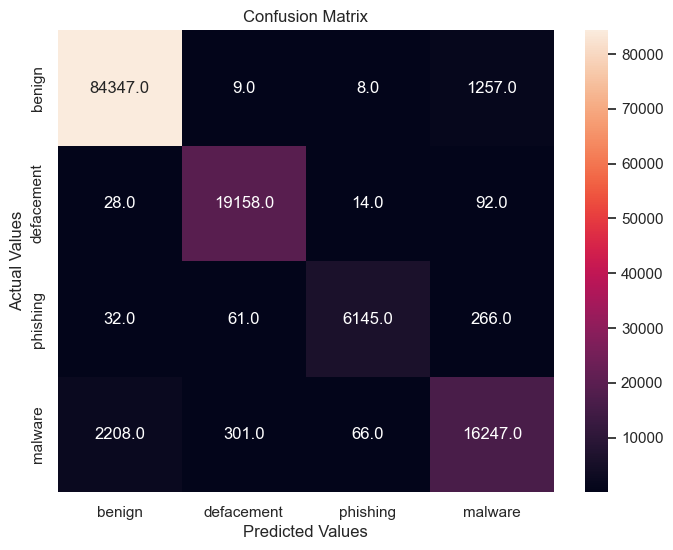

In [94]:
conf_rf=confusion_matrix(y_test,test_pred_rf)
conf_df_rf=pd.DataFrame(conf_rf,index=['benign','defacement','phishing','malware'],columns=['benign','defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(conf_df_rf,annot=True,fmt='.1f')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

<Axes: >

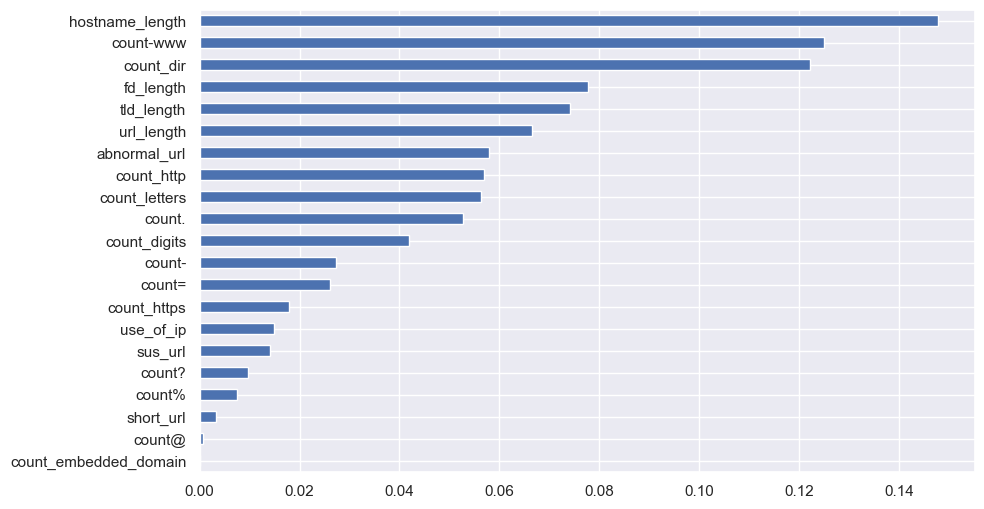

In [98]:
feat_imp_rf=pd.Series(model_rf.feature_importances_,index=x_train.columns)
feat_imp_rf.sort_values().plot(kind='barh',figsize=(10,6))

### **2. Light GBM Classifier**

In [102]:
lgb=LGBMClassifier(objective='multiclass',boosting_type='gbdt',n_jobs=5,verbose=-1,random_state=5)
model_lgb=lgb.fit(x_train,y_train)

In [105]:
train_pred_lgb=model_lgb.predict(x_train)
test_pred_lgb=model_lgb.predict(x_test)

In [106]:
print(f'Training Accuracy for LightGBM Classifier : ',accuracy_score(y_train,train_pred_lgb)*100)
print(f'Testing Accuracy for LightGBM Classifier : ',accuracy_score(y_test,test_pred_lgb)*100)

Training Accuracy for LightGBM Classifier :  96.16509774412998
Testing Accuracy for LightGBM Classifier :  95.95666428642727


In [107]:
print(classification_report(y_test,test_pred_lgb,target_names=['benign','defacement','phishing','malware']))

              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85621
  defacement       0.96      0.99      0.98     19292
    phishing       0.97      0.90      0.94      6504
     malware       0.91      0.83      0.86     18822

    accuracy                           0.96    130239
   macro avg       0.95      0.93      0.94    130239
weighted avg       0.96      0.96      0.96    130239



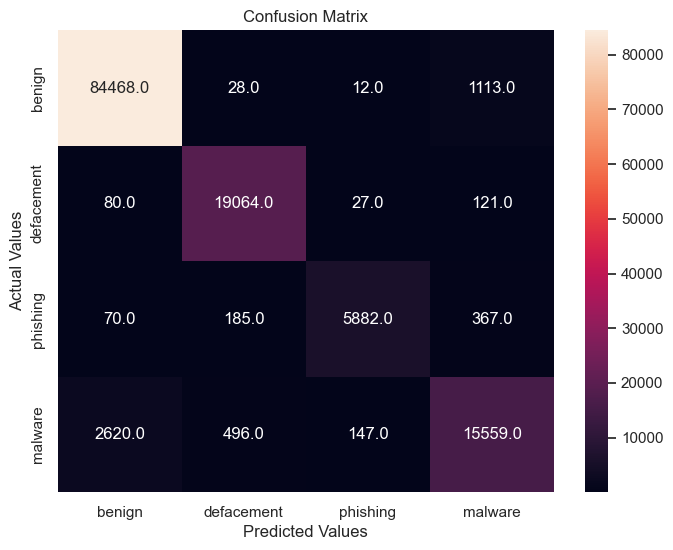

In [122]:
conf_lgb=confusion_matrix(y_test,test_pred_lgb)
conf_df_lgb=pd.DataFrame(conf_lgb,index=['benign','defacement','phishing','malware'],columns=['benign','defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(conf_df_lgb,annot=True,fmt='.1f')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

<Axes: >

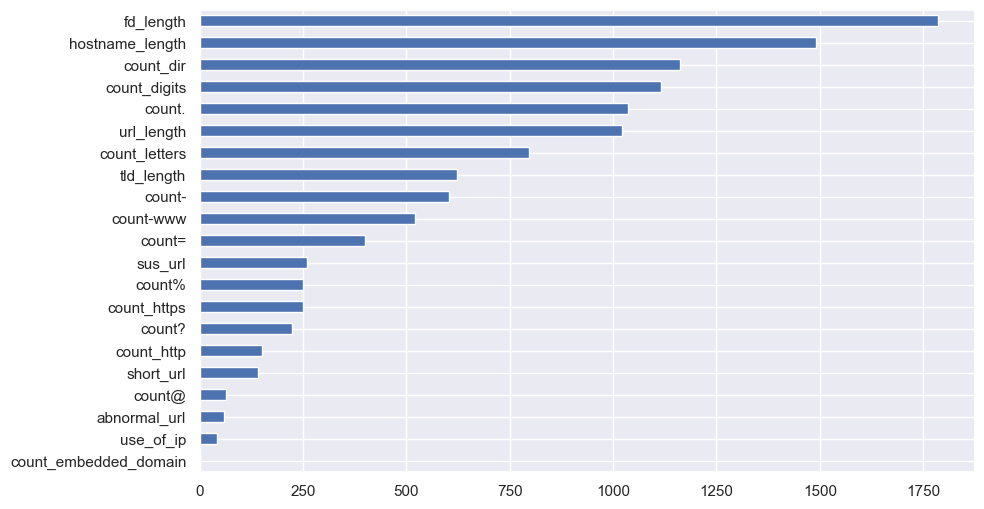

In [123]:
feat_imp_lgb=pd.Series(model_lgb.feature_importances_,index=x_train.columns)
feat_imp_lgb.sort_values().plot(kind='barh',figsize=(10,6))

### **3. XGBoost Classifier**

In [110]:
xgb_classifier=xgb.XGBClassifier(n_estimators=100)
model_xgb=xgb_classifier.fit(x_train,y_train)

In [111]:
train_pred_xgb=model_xgb.predict(x_train)
test_pred_xgb=model_xgb.predict(x_test)

In [113]:
print(f'Training Accuracy for XGBoost Classifier : ',accuracy_score(y_train,train_pred_xgb)*100)
print(f'Testing Accuracy for XGBoost Classifier : ',accuracy_score(y_test,test_pred_xgb)*100)

Training Accuracy for XGBoost Classifier :  96.46954037991983
Testing Accuracy for XGBoost Classifier :  96.20927679113015


In [114]:
print(classification_report(y_test,test_pred_xgb,target_names=['benign','defacement','phishing','malware']))

              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85621
  defacement       0.97      0.99      0.98     19292
    phishing       0.98      0.92      0.95      6504
     malware       0.91      0.83      0.87     18822

    accuracy                           0.96    130239
   macro avg       0.96      0.93      0.94    130239
weighted avg       0.96      0.96      0.96    130239



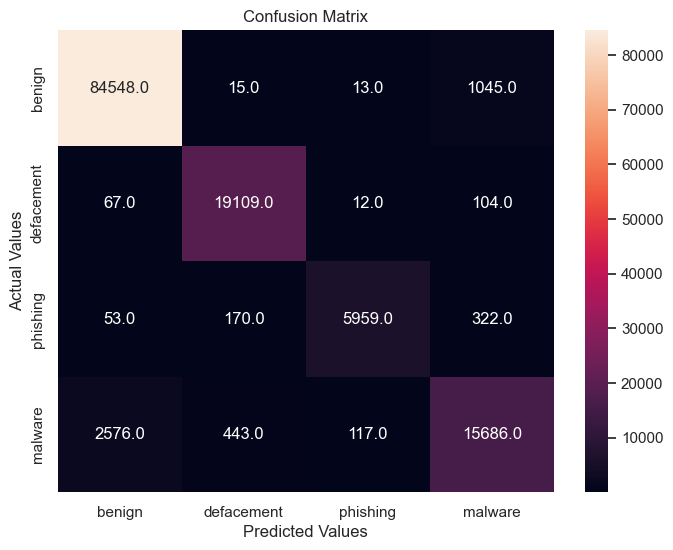

In [120]:
conf_xgb=confusion_matrix(y_test,test_pred_xgb)
conf_df_xgb=pd.DataFrame(conf_xgb,index=['benign','defacement','phishing','malware'],columns=['benign','defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(conf_df_xgb,annot=True,fmt='.1f')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

<Axes: >

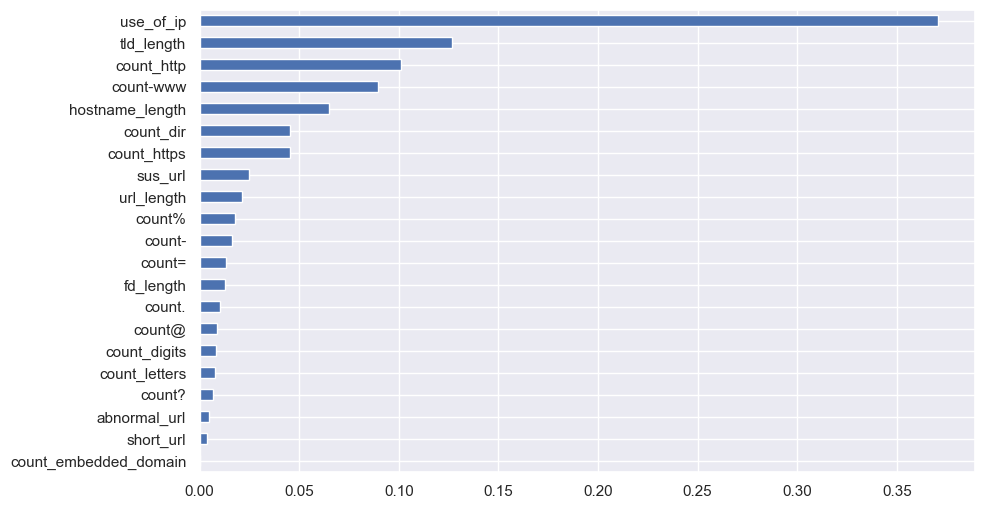

In [125]:
feat_imp_xgb=pd.Series(model_xgb.feature_importances_,index=x_train.columns)
feat_imp_xgb.sort_values().plot(kind='barh',figsize=(10,6))

# **Prediction**

In [127]:
x.columns

Index(['use_of_ip', 'abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embedded_domain', 'short_url', 'count_https',
       'count_http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'count_digits', 'count_letters',
       'fd_length', 'tld_length'],
      dtype='object')

In [128]:
def main(url):
    status=[]
    status.append(having_ip_address(url))
    status.append(abnormal_url(url))
    status.append(count_dots(url))
    status.append(count_www(url))
    status.append(count_attherate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embeddings(url))
    status.append(shorten_url(url))
    status.append(count_https(url))
    status.append(count_http(url))
    status.append(count_percentage(url))
    status.append(count_question(url))
    status.append(count_hyphen(url))
    status.append(count_equalto(url))
    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld=get_tld(url,fail_silently=True)
    status.append(tld_length(tld))
    return status

In [158]:
from collections import Counter
def get_prediction_from_url(test_url):
    feature_test=main(test_url)
    feature_test=np.array(feature_test).reshape((1,-1))

    pred_rf=model_rf.predict(feature_test)
    pred_lgb=model_lgb.predict(feature_test)
    pred_xgb=model_xgb.predict(feature_test)

    predictions = [pred_rf[0], pred_lgb[0], pred_xgb[0]]
    prediction_counts = Counter(predictions)
    most_common_prediction = prediction_counts.most_common(1)[0]

    # Check for majority
    if most_common_prediction[1] > 1:
        final_prediction = most_common_prediction[0]
    
    if int(final_prediction)==0:
        return "Safe URL"
    elif int(final_prediction)==1.0:
        return "Defacement URL"
    elif int(final_prediction)==2.0:
        return "Phishing URL"
    elif int(final_prediction)==3.0:
        return "Malware URL"

In [161]:
print(get_prediction_from_url('https://github.com/SubhoHazra07/Top-100-Codes-solved-by-me/tree/main/Basic%20Programs'))

Safe URL


c:\Users\Subho Hazra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **Save the Model**

In [162]:
import joblib
joblib.dump(model_rf, 'model_rf.pkl')
joblib.dump(model_lgb, 'model_lgb.pkl')
joblib.dump(model_xgb, 'model_xgb.pkl')

['model_xgb.pkl']